In [24]:
import pandas as pd
import nltk
from nltk.corpus import words

In [69]:

# Download the list of English words from nltk
nltk.download('words')
english_words = set(words.words())

def clean_text(text):
    if isinstance(text, str):
        # Tokenize the text and keep only English words
        tokens = nltk.word_tokenize(text)
        cleaned_text = ' '.join(word for word in tokens if word.lower() in english_words or not word.isalpha())
        return cleaned_text
    else:
        return text


# Load the Excel file
file_path = '/content/Brooklyn_Bridge-.csv'  # Replace with the path to your input Excel file
df = pd.read_csv(file_path)

print(df.head())


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


           Time                                             Review
0  2 months ago  It breaks my heart to give such a low note but...
1  2 months ago  Tourist attraction. A whole bunch of very slow...
2  2 months ago  It's a great tourist place, but the vendors ki...
3  3 months ago  Brooklyn bridge was a huge let down. DO NOT CR...
4  2 months ago  Too crowded and annoying tourist traps everywh...


In [70]:
print(df['Review'].head)

<bound method NDFrame.head of 0       It breaks my heart to give such a low note but...
1       Tourist attraction. A whole bunch of very slow...
2       It's a great tourist place, but the vendors ki...
3       Brooklyn bridge was a huge let down. DO NOT CR...
4       Too crowded and annoying tourist traps everywh...
                              ...                        
5300    It's fine there is better observation decks it...
5301    Awful place, long lines that makes you feel li...
5302    My 3rd visit to the Empire State Building. You...
5303    Can’t beat the view from the top, but getting ...
5304    Paid extra to visit at sunset. Wouldn’t let us...
Name: Review, Length: 5305, dtype: object>


In [71]:
!pip install openpyxl

In [72]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
df['Review'] = df['Review'].apply(clean_text)

In [74]:
print(df['Review'].head)

<bound method NDFrame.head of 0       It my heart to give such a low note but during...
1       Tourist attraction . A whole bunch of very slo...
2       It 's a great tourist place , but the kill the...
3       bridge was a huge let down . DO NOT CROSS BY F...
4       Too crowded and annoying tourist traps everywh...
                              ...                        
5300    It 's fine there is better observation it 's b...
5301    Awful place , long that you feel like you a ca...
5302    My 3rd visit to the Empire State Building . Yo...
5303    Can ’ t beat the view from the top , but getti...
5304    extra to visit at sunset . ’ t let us in for 1...
Name: Review, Length: 5305, dtype: object>


In [75]:
# Save the cleaned data to a new CSV file
output_file_path = '/content/CSV1.csv'  # Specify the path for the output CSV file
df.to_csv(output_file_path, index=False)

print(f"Cleaned data saved to {output_file_path}")


Cleaned data saved to /content/CSV1.csv


In [76]:
from nltk.tokenize import word_tokenize

# Function to tokenize the text, handling non-string values
def tokenize_text(text):
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

# Tokenize the text in the 'Review' column
df['Tokens'] = df['Review'].apply(tokenize_text)



In [77]:
print(df['Tokens'].head)

<bound method NDFrame.head of 0       [It, my, heart, to, give, such, a, low, note, ...
1       [Tourist, attraction, ., A, whole, bunch, of, ...
2       [It, 's, a, great, tourist, place, ,, but, the...
3       [bridge, was, a, huge, let, down, ., DO, NOT, ...
4       [Too, crowded, and, annoying, tourist, traps, ...
                              ...                        
5300    [It, 's, fine, there, is, better, observation,...
5301    [Awful, place, ,, long, that, you, feel, like,...
5302    [My, 3rd, visit, to, the, Empire, State, Build...
5303    [Can, ’, t, beat, the, view, from, the, top, ,...
5304    [extra, to, visit, at, sunset, ., ’, t, let, u...
Name: Tokens, Length: 5305, dtype: object>


In [78]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

# Remove stop words from the tokens
df['Tokens'] = df['Tokens'].apply(remove_stopwords)


In [80]:
from nltk import FreqDist

# Create a frequency distribution of words in the 'Tokens' column
fdist = FreqDist(word for tokens in df['Tokens'] for word in tokens)

# Get the most common words
common_words = fdist.most_common(10)
print(common_words)


[('.', 9026), (',', 4674), ('!', 1585), ('…', 1359), ('bridge', 898), ('place', 771), ('park', 762), ('’', 757), ("'s", 722), ('see', 705)]


In [81]:
from nltk.text import ConcordanceIndex

# Create a concordance index for a specific word
concordance_idx = ConcordanceIndex(df['Tokens'].sum())
concordance_idx.print_concordance("hate", width=40, lines=5)


Displaying 5 of 11 matches:
ross early late . hate new traffic contr
place , stay away hate Needs Overcrowded
turn around . n't hate , contrary travel
. find Cheap like hate t-shirts . Wonder
 solar … Terrible hate Would n't want an


In [82]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to stem the tokens
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Stem the tokens in the 'Tokens' column
df['Stemmed Tokens'] = df['Tokens'].apply(stem_tokens)


In [83]:
print(df['Stemmed Tokens'].head)

<bound method NDFrame.head of 0       [heart, give, low, note, last, bridg, icon, sp...
1       [tourist, attract, ., whole, bunch, slow, walk...
2       ['s, great, tourist, place, ,, kill, whole, .,...
3       [bridg, huge, let, ., cross, foot, !, !, bette...
4       [crowd, annoy, tourist, trap, everywher, ., wo...
                              ...                        
5300     ['s, fine, better, observ, 's, bore, small, top]
5301    [aw, place, ,, long, feel, like, cattl, driven...
5302    [3rd, visit, empir, state, build, ., wonder, v...
5303    [’, beat, view, top, ,, get, hellish, ., spent...
5304    [extra, visit, sunset, ., ’, let, us, 10, ., f...
Name: Stemmed Tokens, Length: 5305, dtype: object>


In [84]:
# Download the NLTK NER data
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [85]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [86]:
from nltk import pos_tag

# Function to perform part-of-speech tagging using NLTK, handling non-string values
def pos_tagging(tokens):
    if isinstance(tokens, list):
        return pos_tag(tokens)
    else:
        return []

# Apply part-of-speech tagging to the 'Tokens' column
df['POS Tags'] = df['Tokens'].apply(pos_tagging)


In [87]:
print(df['POS Tags'])

0       [(heart, NN), (give, VB), (low, JJ), (note, NN...
1       [(Tourist, NN), (attraction, NN), (., .), (who...
2       [('s, POS), (great, JJ), (tourist, NN), (place...
3       [(bridge, NN), (huge, JJ), (let, NN), (., .), ...
4       [(crowded, VBN), (annoying, VBG), (tourist, NN...
                              ...                        
5300    [('s, POS), (fine, JJ), (better, JJR), (observ...
5301    [(Awful, JJ), (place, NN), (,, ,), (long, RB),...
5302    [(3rd, CD), (visit, NN), (Empire, NNP), (State...
5303    [(’, JJ), (beat, NN), (view, NN), (top, NN), (...
5304    [(extra, JJ), (visit, NN), (sunset, NN), (., ....
Name: POS Tags, Length: 5305, dtype: object


In [90]:
# Specify the path where you want to save the CSV file
output_csv_path = '/content/Updated5.csv'  # Replace with your desired file path

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)

# Print a message indicating the file has been saved
print(f"DataFrame saved to {output_csv_path}")


DataFrame saved to /content/Updated5.csv


In [92]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [95]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [103]:
# Load your dataset (assuming it's in a CSV file)
data = pd.read_csv('/content/Updated (1).csv')  # Replace 'your_data.csv' with your file

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to assign labels based on sentiment scores
def label_sentiment(text):
    if isinstance(text, str):
        ss = sid.polarity_scores(text)
        if ss['compound'] >= 0.05:
            return 'Positive'
        elif ss['compound'] <= -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    else:
        return 'Not a string'  # or handle this case as needed

# Apply sentiment analysis and assign labels to the 'Sentiment' column
data['Sentiment'] = data['Review'].apply(label_sentiment)

print(data.head())

          Time                                             Review  \
0   a week ago  Iconic spot of New York City , plethora of peo...   
1  a month ago  It 's one of the most happening in New York Ci...   
2   a week ago  I love . It was an amazing experience . Ground...   
3  2 weeks ago  Excellent vibrant location day and night . Bas...   
4  a month ago  The tourist magnet of New York City ! Lots of ...   

  Time of Visit                                             Tokens  \
0           NaN  ['Iconic', 'spot', 'New', 'York', 'City', ',',...   
1           NaN  ["'s", 'one', 'happening', 'New', 'York', 'Cit...   
2       Weekend  ['love', '.', 'amazing', 'experience', '.', 'G...   
3       Weekday  ['Excellent', 'vibrant', 'location', 'day', 'n...   
4       Weekend  ['tourist', 'magnet', 'New', 'York', 'City', '...   

                                      Stemmed Tokens  \
0  ['icon', 'spot', 'new', 'york', 'citi', ',', '...   
1  ["'s", 'one', 'happen', 'new', 'york', 'citi',...

In [105]:
# Save the labeled data back to a CSV file
data.to_csv('labeled_data_1.csv', index=False)  # Replace 'labeled_data.csv' with your desired file name

In [89]:
!pip install wordcloud


In [67]:
df_unique = df.drop_duplicates(subset='Review', keep='first')

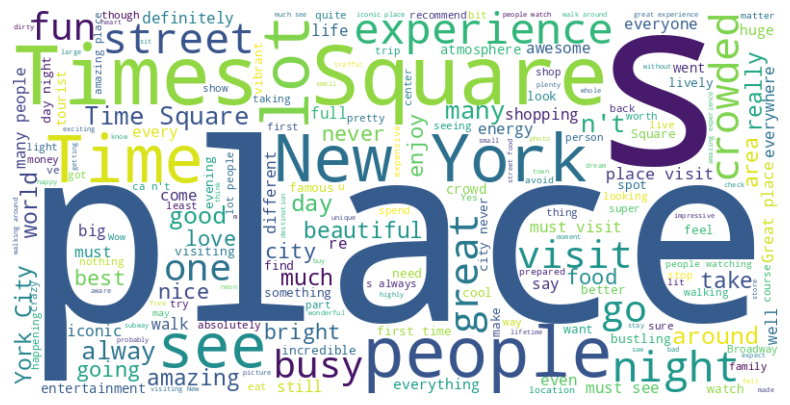

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens into a single string
all_tokens = ' '.join(' '.join(tokens) for tokens in df['Tokens'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
